# Flatmap: SUITPy
	
As part of the SUIT toolbox, we have developed a flat representation of the human cerebellum that can be used to visualise imaging data after volume-based normalisation and averaging across subjects. The method uses an approximate outer (grey-matter) and inner (white-matter) surface defined on the SUIT template (see figure below). Functional data between these two surfaces is projected to the surface along the lines connecting corresponding vertices. By applying cuts (thick black lines) the surface could be flattened out. We aimed to retain a roughly proportional relationship between the surface area of the 2D-representation and the volume of the underlying cerebellar grey matter. The map allows users to visualise the activation state of the complete cerebellar grey matter in one concise view, equally revealing both the anterior-posterior (lobular) and medial-lateral organisation. To explore the flatmap in more detail, check out our online cerebellar atlas viewer.

![title](jupyter-img/suit_flat_1.jpg)

The surface representation of the cerebellum is a group surface, designed to display functional data that has been averaged across participants in volumetric group space. It does not rely on reconstructions of individual surfaces. While latter is the best practice for the neocortex, unfolding the cerebellar surface of individual subjects is very hard and requires anatomical scans of very high resolution and quality.

![title](jupyter-img/suit_flat_2.jpg)

Thus there are three steps involved:
- Normalise data to a group space
- Map the data to the surface
- Display the data

For more details, see:
- Diedrichsen, J. & Zotow, E. (2015). Surface-based display of volume-averaged cerebellar data. PLoS One, 7, e0133402 (http://www.diedrichsenlab.org/pubs/PlosOne_flatmap_2015.pdf). 
- Video: https://www.youtube.com/watch?v=LipA4B73z-w&feature=youtu.be

## Installation and Requirements
Ensure you have Python and pip installed on your system. 

- Python: https://www.python.org/downloads/
- Pip: https://pip.pypa.io/en/stable/installing/

You will need to download the following dependencies:
- nibabel
- numpy
- matplotlib

For using openGL version: 
- glfw
- PyOpenGL

Open your command prompt and paste the following command:
pip install nibabel numpy matplotlib glfw PyOpenGL PyOpengGL_accelerate

## Mapping
You can map a list of volumes to the flat map with the following commands

In [5]:
# Import the Suit package
import SUITPy as suit
import matplotlib.pyplot as plt

In [6]:
# This command maps a functional volume to the surface. 
# The mapped data is returned as a numpy array
funcdata = suit.flatmap.vol_to_surf(['functionalMapsSUIT/MDTB08_Math.nii'])

## Plotting
The current version of the plotting routine utilizes matplotlib

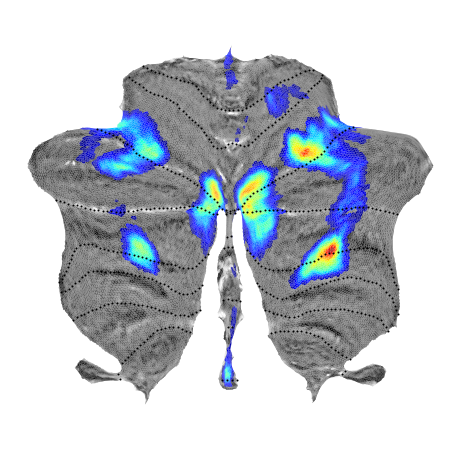

In [11]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax=suit.flatmap.plot(funcdata,threshold=0.03)

## Plotting using OpenGL
We also have a different version of the plotting functionality coded in OpenGL

In [4]:
import SUITPy.flatmapOLG as flatmap 

# Figure 1
flatmap.plot("data/Wiestler_2011_motor_z.gii", cscale=[0,2], output_file="output/figure_1.jpg")

# Figure 2
flatmap.plot("data/HCP_WM_BODY_vs_REST.gii", cscale=[0,2], cmap="hot", threshold=[0.25], output_file="output/figure_2.jpg")

# Figure 3
flatmap.plot("data/Buckner_7Networks.gii", overlay_type="label", cmap="data/labels_cmap.txt", output_file="output/figure_3.jpg")

ModuleNotFoundError: No module named 'SUITPy.flatmapOLG'

![title](jupyter-img/examples.png)

You can plot your own flatmap using the command:

Data can be a 28935x1 vector, which correspond to the value of each vertex of the flatmap.If the type is set to 'rgb', the function expects a 28935x3 matrix, with r(ed), b(lue), and g(reen) values for each node. For places where the vector is NaN, the grey underlay will shine through. You have the option of also displaying the lobular boundaries (or other borders) as black dotted lines on the map.

Optional arguments are:
- flat_dir:    Path of the directory where surface, underlay, border files are stored (default = data folder)
- surf:    Surface gifti file (default = "FLAT.surf.gii" located in data folder)
- under:    Specific a shape.gii file that dictates the shape of the grey underlay (default = "SUIT.shape.gii" located in data folder)
- undermap:    matplotlib colormap used for underlay, see matplotlib for more (defaults to gray surface cmap)
- underscale:    Color scale to determine the value to color mapping for the underlay (default = [-1, 0.5])
- threshold:    show only values above this threshold (default = [0])
- cscale:    Color scale: determines the mapping of values to color map (default = [max, min]) 
- cmap:    matplotlib colormap for overlay, see matplotlib for more colormaps. (default = "parula")
- borders:    txt file containing coordinates (x,y,z) of the border pixels (default = "borders.txt")
- alpha:    alpha blending of overlay and underlay (default = 1)"
- overlay_type:    label, func, rgb (default = "func")
- output_file: Full filepath of the location to store outputted screenshot. Writes to JPG, PNG, PDF, GIF types. See https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html for more formats. (default: 'output/file.jpg') 

See full documentation in the Sphinx docs.